# Make Gradient Plots

This is another visual of the chromosome event. This displays the events through gradients.

## Setup

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import cptac
import numpy as np
import cnvutils
import matplotlib as mpl

cptac warning: Your version of cptac (0.8.5) is out-of-date. Latest is 0.8.6. Please run 'pip install --upgrade cptac' to update it. (C:\Users\chels\anaconda3\envs\notebooks\lib\site-packages\ipykernel_launcher.py, line 4)


In [2]:
# Indicate the chromosome you would like to look at.
CHROMOSOME = '13'
# Indicate whether you want to look at gain, loss or both
GAIN_OR_LOSS = 'both'
# Indicate the cancer types you want plotted
CANCER_TYPES = ['BRCA', 'CCRCC', 'COLON', 'ENDO', 'GBM', 'HNSCC', 'LSCC', 'LUAD', 'OVARIAN']

In [3]:
counts = cnvutils.get_counts_table()

C:\Users\chels\anaconda3\envs\notebooks\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [4]:
reds = ['#FFFFFF', '#FDF0F0', '#FCE2E2', '#FAD3D3', '#F8C5C5', '#F6B6B6', '#F5A7A7', '#F39999', '#F18A8A', '#EF7B7B', '#EE6D6D', '#EC5E5E', '#EA5050', '#E84141', '#E73232', '#E52424', '#E31515']
blues = ['#FFFFFF', '#F2F0FD', '#E5E0FA', '#D7D1F8', '#CAC2F5', '#BDB2F3', '#B0A3F0', '#A393EE', '#9684EB', '#8875E9', '#7B65E6', '#6E56E4', '#6147E1', '#5437DF', '#4628DC', '#3918DA', '#2C09D7']
gradient = blues[::-1] + reds

## Prepare Tables

In [5]:
chromosome_counts = counts[counts.chromosome == CHROMOSOME]

In [6]:
gain_loss_counts = chromosome_counts.pivot_table(index=['Name', 'cancer'], columns='variable')
gain_loss_counts.columns = gain_loss_counts.columns.to_flat_index()
gain_loss_counts = gain_loss_counts.drop(columns=('start_bp', 'gain'))
gain_loss_counts = gain_loss_counts.drop(columns=('end_bp', 'gain'))
gain_loss_counts = gain_loss_counts.rename(columns = {gain_loss_counts.columns[0]: 'end_bp', gain_loss_counts.columns[1]: 'start_bp', gain_loss_counts.columns[2]: 'gain', gain_loss_counts.columns[3]: 'loss'}, )

In [7]:
gain_loss_counts['length'] = gain_loss_counts.end_bp - gain_loss_counts.start_bp
gain_loss_counts['value'] = gain_loss_counts.gain - gain_loss_counts.loss
gain_loss_counts['bars'] = list(zip(gain_loss_counts.start_bp, gain_loss_counts.length))

In [8]:
gain_loss_counts

end_bp    start_bp  gain  loss    length  value  \
Name     cancer                                                         
ABCC4    BRCA     95301475.0  95019835.0  12.0  44.0  281640.0  -32.0   
         CCRCC    95301475.0  95019835.0   5.0   9.0  281640.0   -4.0   
         COLON    95301475.0  95019835.0  54.0   7.0  281640.0   47.0   
         ENDO     95301475.0  95019835.0   3.0   8.0  281640.0   -5.0   
         GBM      95301475.0  95019835.0   3.0  26.0  281640.0  -23.0   
...                      ...         ...   ...   ...       ...    ...   
ZMYM5    LUAD     19863649.0  19823482.0   3.0  42.0   40167.0  -39.0   
         OVARIAN  19863649.0  19823482.0   7.0  47.0   40167.0  -40.0   
ZNF646P1 HNSCC    53409876.0  53408882.0   7.0  26.0     994.0  -19.0   
ZNF962P  HNSCC    18485448.0  18467172.0   5.0  27.0   18276.0  -22.0   
ZNF965P  HNSCC    18734896.0  18734080.0   5.0  28.0     816.0  -23.0   

                                    bars  
Name     cancer                           
ABCC4    BRCA     (95019835.0, 281640.0)  
         CCRCC    (95019835.0, 281640.0)  
         COLON    (95019835.0, 281640.0)  
         ENDO     (95019835.0, 281640.0)  
         GBM      (95019835.0, 281640.0)  
...                                  ...  
ZMYM5    LUAD      (19823482.0, 40167.0)  
         OVARIAN   (19823482.0, 40167.0)  
ZNF646P1 HNSCC       (53408882.0, 994.0)  
ZNF962P  HNSCC     (18467172.0, 18276.0)  
ZNF965P  HNSCC       (18734080.0, 816.0)  

[4654 rows x 7 columns]

## Map Colors

In [9]:
def map_color(val):
    i = (val + 85) // 5
    if i < 0:
        i = 0
    if i > 33:
        i=33
    return gradient[int(i)]

In [10]:
def map_reds(val):
    i = val // 5
    if i > 16:
        i = 16
    return reds[int(i)]

In [11]:
def map_blues(val):
    i = val // 5
    if i > 16:
        i = 16
    return blues[int(i)]

In [12]:
if GAIN_OR_LOSS == 'both':
    gain_loss_counts['color'] = gain_loss_counts.value.apply(map_color)
elif GAIN_OR_LOSS == 'gain':
    gain_loss_counts['color'] = gain_loss_counts.gain.apply(map_reds)
elif GAIN_OR_LOSS == 'loss':
    gain_loss_counts['color'] = gain_loss_counts.loss.apply(map_blues)
else:
    print("Error! GAIN_OR_LOSS has the following options: 'gain', 'loss', 'both'")

In [13]:
gain_loss_counts.reset_index(inplace=True)

## Load in cancer driver genes
This data comes from the article "Comprehensive Characterization of Cancer Driver Genes and Mutations" ([29625053](https://pubmed.ncbi.nlm.nih.gov/29625053/))


In [14]:
# You may need to change the path to this file
driver_genes = cnvutils.get_driver_genes()

In [15]:
driver_genes = driver_genes.dropna(how="all")
driver_genes = driver_genes.dropna(how='all', axis=1)

In [16]:
driver_genes

,Gene,Cancer,KEY,Tumor suppressor or oncogene prediction (by 20/20+),Decision,Tissue Frequency,Pancan Frequency,Consensus Score,Correlation adusted score,Novel,Rescue Notes,Note about previous publication
0,ABL1,PANCAN,ABL1_PANCAN,NaN,rescued,NaN,1.17%,0.0,NaN,0.0,Evidence from OncoImpact/DriverNET overlap (SN...,NaN
1,ACVR1,UCEC,ACVR1_UCEC,oncogene,official,5.30%,0.75%,1.5,1.5,0.0,NaN,0
2,ACVR1B,PANCAN,ACVR1B_PANCAN,possible tsg,official,NaN,1.09%,1.0,0.0,0.0,NaN,Found in 24132290
3,ACVR2A,COADREAD,ACVR2A_COADREAD,tsg,official,2.85%,1.40%,1.5,1.5,0.0,NaN,Found in 22810696
4,ACVR2A,LIHC,ACVR2A_LIHC,possible tsg,official,3.11%,1.40%,1.5,1.5,0.0,NaN,Found in private communication about integrati...
...,...,...,...,...,...,...,...,...,...,...,...,...
734,ZMYM3,PRAD,ZMYM3_PRAD,tsg,official,1.68%,1.85%,1.0,0.0,1.0,NaN,Found in 26544944
735,ZNF133,OV,ZNF133_OV,oncogene,official,2.94%,0.61%,1.5,1.5,1.0,NaN,Found in 21720365
736,ZNF750,PANCAN,ZNF750_PANCAN,possible tsg,official,NaN,1.15%,1.5,1.5,0.0,NaN,0
737,ZNF750,ESCA,ZNF750_ESCA,possible tsg,official,6.98%,1.15%,2.5,2.5,0.0,NaN,Found in 28052061


## Create the plot

TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

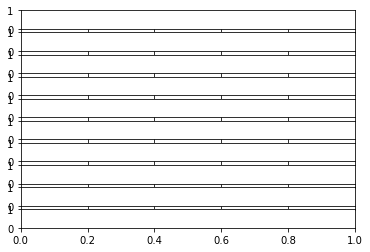

In [20]:
fig, ax = plt.subplots(nrows=len(CANCER_TYPES) + 1, sharex=True, sharey=False)

#If you would like to add a caption to your figure, you can add it here
txt = r"$\bf{Distribution\ of\ gain\ and\ loss\ events\ on\ Chromosome\ 8.}$" + "Color was \n determined by taking the count of patients with gain \
minus the \n number of patients with a loss event, for each gene. E.g., a gene \n where 20 patients had a gain and 80 had a \
loss would be displayed \n at -60."
count = 0
for cancer in CANCER_TYPES:
    df = gain_loss_counts[gain_loss_counts.cancer == cancer]
    df = df.sort_values('start_bp')
    start_values = df.start_bp
    continuous_values = list()
#     prev = None
#     for val in start_values:
#         if not prev:
#             continuous_values.append(val)
#         continuous_values.append((prev, val-prev))
#         prev = val
    ax[count].broken_barh(df.bars, (0,1), facecolors=df.color)
    ax[count].text(np.max(start_values)+5000000, 0.35, cancer)
    ax[count].set_frame_on(False)
    ax[count].get_xaxis().set_visible(False)
    ax[count].get_yaxis().set_visible(False)
    count += 1
cnvutils.make_chromosome_plot(CHROMOSOME, ax=ax[count], genes=list(driver_genes.index.unique()), above=False)
# cnvutils.make_chromosome_plot(CHROMOSOME, ax=ax[count])

fig.subplots_adjust(right=0.8)
fig.suptitle(f"Chromosome {CHROMOSOME} Copy Number Events")
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
colors = mpl.colors.ListedColormap(gradient)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=-85, vmax=85), cmap=colors), cax=cbar_ax)
cbar.ax.set_ylabel('Net gain or loss per gene')
fig.text(0.12, -.22, txt, ha='left')
# cbar.yaxis.set_

In [ ]:
fig, ax = plt.subplots(figsize=(8,.4))
cnvutils.make_chromosome_plot(CHROMOSOME, ax=ax, genes=list(driver_genes.Gene.unique()), above=True)


In [ ]:
locations = cnvutils.get_gene_locations()

In [ ]:
locations

In [ ]:
driver_genes = cnvutils.get_driver_genes()
driver_genes = driver_genes.set_index('Gene')
driver_genes.index.rename('Name', inplace=True)

In [ ]:
driver_with_loc = driver_genes.reset_index().merge(locations.reset_index())

In [ ]:
driver_with_loc[(driver_with_loc.chromosome == CHROMOSOME)].Name.unique()